In [1]:
import pandas as pd
import numpy as np 
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/lunar-tech-case-study-ab-testing/ab_test_click_data (1).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


In [3]:
data.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [4]:
#since we are doing A/B testing we are trying to find the effect of changes in the product so we need to use only click and group   

In [5]:
exp_sum = data[data['group'] == 'exp']['click'].sum()
con_sum = data[data['group'] == 'con']['click'].sum() if 'con' in data['group'].values else 0
total_exp = (data['group'] == 'exp').sum()
total_con = (data['group'] == 'con').sum()

prob_exp = exp_sum / total_exp
prob_con = con_sum / total_con

In [6]:
print(f"Sum of '1's in exp: {exp_sum}")
print(f"Sum of '1's in con: {con_sum}")
print(f"Total exp count: {total_exp}")
print(f"Total con count: {total_con}")

Sum of '1's in exp: 6116
Sum of '1's in con: 1989
Total exp count: 10000
Total con count: 10000


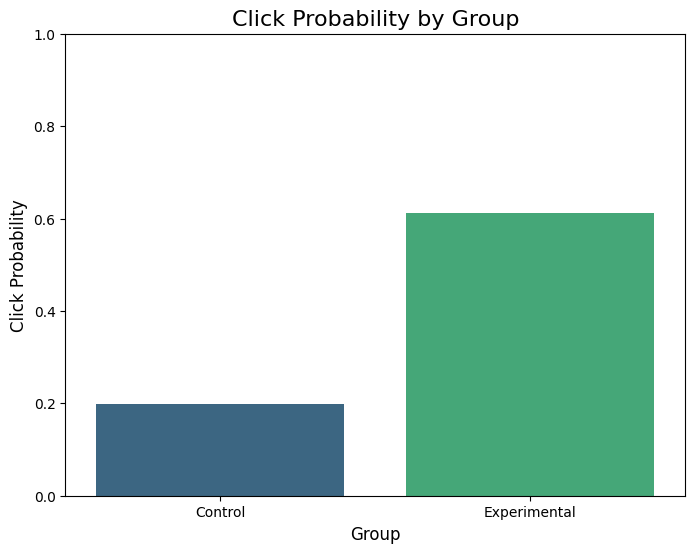

In [7]:
probabilities = {
    "Control": prob_con,
    "Experimental": prob_exp
}

prob_df = pd.DataFrame(list(probabilities.items()), columns=["Group", "Click Probability"])

# Bar plot 
plt.figure(figsize=(8, 6))
sns.barplot(data=prob_df, x="Group", y="Click Probability", palette="viridis")
plt.title("Click Probability by Group", fontsize=16)
plt.ylabel("Click Probability", fontsize=12)
plt.xlabel("Group", fontsize=12)
plt.ylim(0, 1)
plt.show()


In [8]:
# It is so obvious there is a significant difference between control group and experiment group that shows that the change in the product highly effects consumer actions but in order to prove we will further apply the Z test 

In [9]:
#Power Analysis------ We will decide the power, significance level and Minimum Detectable Effect

In [10]:
#Usually the companies decide the power then start to gathering data but since in that case ew have data we will find the power 

In [11]:
alpha = 0.01 # because there is really big probabalistic difference 

z_alpha = norm.ppf(1 - alpha / 2) 

SE = math.sqrt((prob_exp * (1 - prob_exp) / total_exp) + (prob_con * (1 - prob_con) / total_con))
MDE = abs(prob_con - prob_exp)

z_effect = MDE / SE 
z_beta = z_alpha - z_effect 

power = 1 - norm.cdf(z_beta)

In [12]:
print("Standart Hata (SE):", SE)
print("Minimum Detectable Effect (MDE):", MDE)
print("Z-Effect:", z_effect)
print("Z-Beta:", z_beta)
print("(Z-Alpha):", z_alpha)
print("Power (Güç):", power)

Standart Hata (SE): 0.006299874840026585
Minimum Detectable Effect (MDE): 0.41270000000000007
Z-Effect: 65.50923795785417
Z-Beta: -62.93340865430527
(Z-Alpha): 2.5758293035489004
Power (Güç): 1.0


In [13]:
# We can see that the Z-Effect is really large and bigger than the Z-alpha value so it is clear that we can reject the null hypothesis

In [14]:
if abs(z_effect) > z_alpha:  # If Z-Effect is greater than the critical value
    result = "H0 rejected: There is a significant difference between the control and experimental groups."
else:
    result = "H0 not rejected: There is no significant difference between the control and experimental groups."

print(result)

H0 rejected: There is a significant difference between the control and experimental groups.


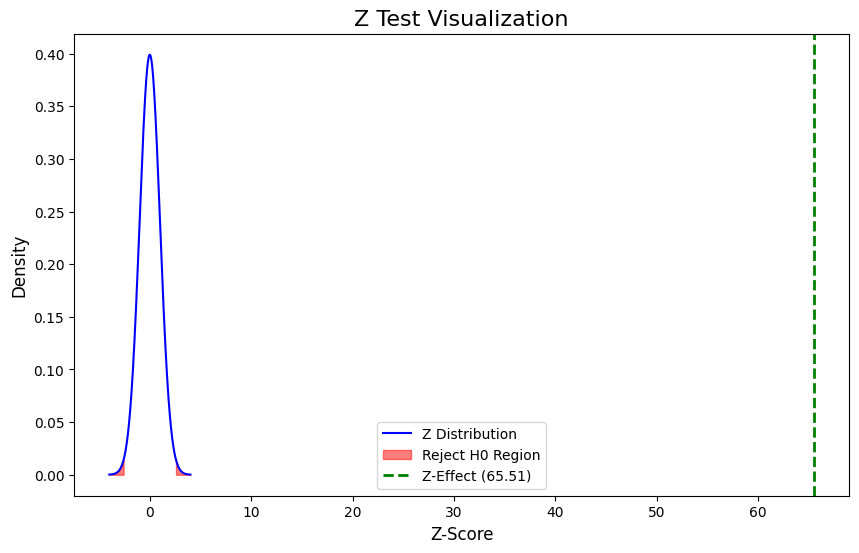

In [15]:
# Z testi görselleştirme
import numpy as np
from scipy.stats import norm

# Z dağılımını oluşturuyoruz
z_values = np.linspace(-4, 4, 500)
z_distribution = norm.pdf(z_values, loc=0, scale=1)

# Kritik değerler (reddetme bölgeleri)
z_critical = [z_alpha, -z_alpha]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(z_values, z_distribution, label="Z Distribution", color="blue")

# Kritik bölgeleri doldurma
plt.fill_between(z_values, 0, z_distribution, where=(z_values >= z_critical[0]), color="red", alpha=0.5, label="Reject H0 Region")
plt.fill_between(z_values, 0, z_distribution, where=(z_values <= z_critical[1]), color="red", alpha=0.5)

# Z-test istatistiğini gösterme
plt.axvline(z_effect, color="green", linestyle="--", linewidth=2, label=f"Z-Effect ({z_effect:.2f})")

# Eksen ve başlıklar
plt.title("Z Test Visualization", fontsize=16)
plt.xlabel("Z-Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()
